## Task - Prediction for different bill categories of the dataset 
### by Mayur Pawar

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_excel('Atlantis motor bills.xlsx')
df

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,B0,D0,C0,E0,930.076541,897.167475,855.332105,837.175251,X0
1,B0,D0,C0,E1,929.726216,897.167475,856.459905,837.175251,X0
2,B0,D0,C0,E2,930.076541,897.167475,856.459905,837.096763,X0
3,B0,D0,C0,E3,926.513586,897.167475,856.459905,837.175251,X0
4,B0,D0,C1,E4,930.076541,897.167475,856.459905,836.399490,X0
...,...,...,...,...,...,...,...,...,...
4715,B8,D15,C4,E1505,816.780325,846.908198,747.866497,738.087166,NaN
4716,B8,D15,C4,E1506,743.441494,804.010713,666.495417,657.722959,NaN
4717,B8,D15,C4,E1507,801.134982,837.856874,794.708694,837.175251,NaN
4718,B8,D15,C4,E486,930.076541,897.167475,856.459905,832.326991,NaN


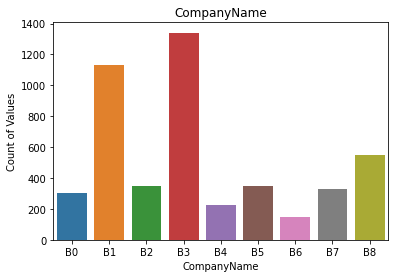

 Top 10 Values 
 B3    1341
B1    1134
B8     548
B2     347
B5     346
B7     330
B0     303
B4     224
B6     147
Name: CompanyName, dtype: int64
****************************************************************************************************


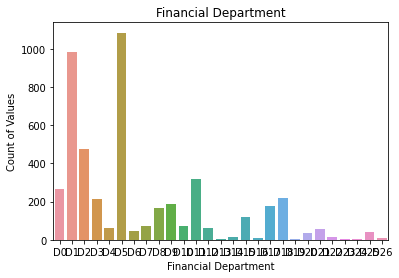

 Top 10 Values 
 D5     1085
D1      984
D2      478
D11     316
D0      266
D18     219
D3      216
D9      186
D17     176
D8      166
Name: Financial Department, dtype: int64
****************************************************************************************************


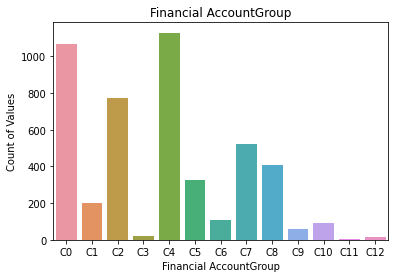

 Top 10 Values 
 C4     1129
C0     1068
C2      771
C7      522
C8      408
C5      325
C1      198
C6      107
C10      94
C9       60
Name: Financial AccountGroup, dtype: int64
****************************************************************************************************


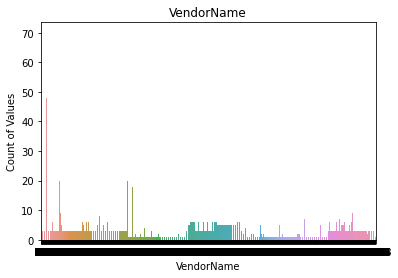

 Top 10 Values 
 E528    70
E25     48
E30     48
E29     45
E9      40
E28     38
E32     36
E26     30
E31     24
E8      23
Name: VendorName, dtype: int64
****************************************************************************************************


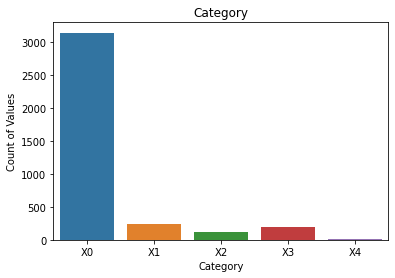

 Top 10 Values 
 X0    3136
X1     232
X3     195
X2     117
X4      15
Name: Category, dtype: int64
****************************************************************************************************


In [39]:
#Categorical Values
for i in df.select_dtypes("object"):
    plt.title(i)
    sns.countplot(x=df[i], data=df)
    plt.xlabel(i)
    plt.ylabel("Count of Values")
    plt.show()

    print(" Top 10 Values \n",df[i].value_counts().sort_values(ascending = False)[:10])
    print("*"*100)


### Spilt the data Into 2 sets of the data with not null and null values as Train and Test

## Train

In [40]:
pd.set_option('display.max_rows',1000)
train = df.loc[:3694]

In [41]:
train

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,B0,D0,C0,E0,930.076541,897.167475,855.332105,837.175251,X0
1,B0,D0,C0,E1,929.726216,897.167475,856.459905,837.175251,X0
2,B0,D0,C0,E2,930.076541,897.167475,856.459905,837.096763,X0
3,B0,D0,C0,E3,926.513586,897.167475,856.459905,837.175251,X0
4,B0,D0,C1,E4,930.076541,897.167475,856.459905,836.399490,X0
...,...,...,...,...,...,...,...,...,...
3690,B5,D11,C5,E29,930.076541,897.167475,856.459905,830.824465,X1
3691,B5,D4,C9,E84,560.500815,662.705398,433.427933,423.173581,X1
3692,B5,D4,C9,E85,930.076541,897.167475,856.459905,837.175251,X0
3693,B5,D4,C9,E86,983.394865,914.078289,894.023282,867.127306,X1


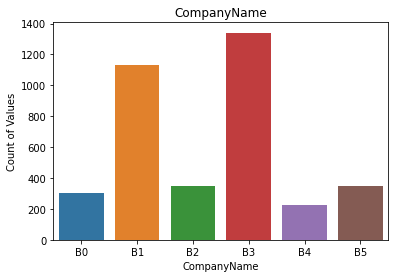

 Top 10 Values 
 B3    1341
B1    1134
B2     347
B5     346
B0     303
B4     224
Name: CompanyName, dtype: int64
****************************************************************************************************


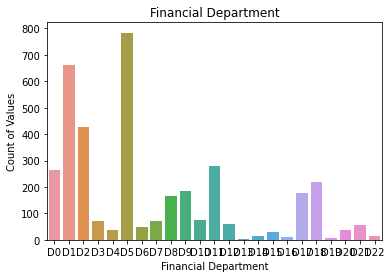

 Top 10 Values 
 D5     784
D1     660
D2     426
D11    280
D0     264
D18    219
D9     186
D17    176
D8     166
D10     74
Name: Financial Department, dtype: int64
****************************************************************************************************


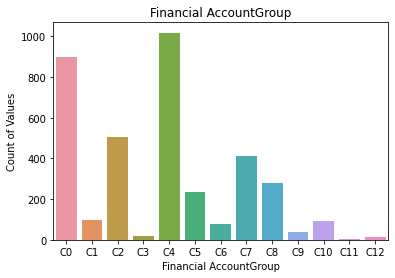

 Top 10 Values 
 C4     1018
C0      897
C2      506
C7      412
C8      278
C5      237
C1       99
C10      94
C6       80
C9       36
Name: Financial AccountGroup, dtype: int64
****************************************************************************************************


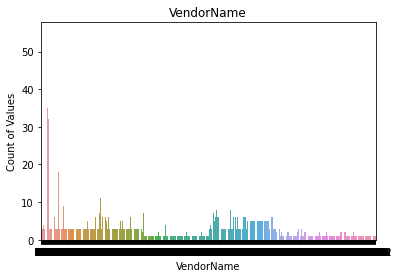

 Top 10 Values 
 E528    55
E30     38
E25     35
E29     32
E28     28
E32     22
E26     22
E9      21
E68     18
E31     16
Name: VendorName, dtype: int64
****************************************************************************************************


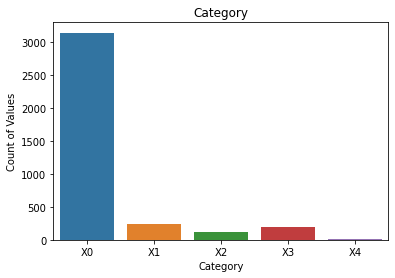

 Top 10 Values 
 X0    3136
X1     232
X3     195
X2     117
X4      15
Name: Category, dtype: int64
****************************************************************************************************


In [42]:
#Categorical Values
for i in train.select_dtypes("object"):
    plt.title(i)
    sns.countplot(x=train[i], data=train)
    plt.xlabel(i)
    plt.ylabel("Count of Values")
    plt.show()

    print(" Top 10 Values \n",train[i].value_counts().sort_values(ascending = False)[:10])
    print("*"*100)

In [43]:
# Check for missing values and data distribution
# Data Analysis and Preprocessing
print(train.dtypes) # Check datatype of each column
print(train.describe()) # Summary statistics of numerical columns
print(train.isnull().sum())

CompanyName                object
Financial Department       object
Financial AccountGroup     object
VendorName                 object
Amount Month 1            float64
Amount Month 2            float64
Amount Month 3            float64
Amount Month 4            float64
Category                   object
dtype: object
       Amount Month 1  Amount Month 2  Amount Month 3  Amount Month 4
count     3695.000000    3.694000e+03     3695.000000    3.694000e+03
mean       911.810327    8.865520e+02      831.308472    8.141451e+02
std         62.004794    4.660137e+01       65.400269    5.779072e+01
min          0.000000    4.821640e-14        0.000000    4.821640e-14
25%        928.297568    8.961401e+02      843.234518    8.248068e+02
50%        930.076541    8.971675e+02      856.189903    8.366967e+02
75%        930.076541    8.971675e+02      856.459905    8.371753e+02
max       1163.521001    1.303063e+03     1237.874227    1.116251e+03
CompanyName               0
Financial Department  

In [44]:
# Impute missing values (mean, median, mode) for the "Amount Month" columns
train["Amount Month 2"].fillna(train["Amount Month 2"].median(), inplace=True)
train["Amount Month 4"].fillna(train["Amount Month 4"].median(), inplace=True)

In [45]:
print(train.isnull().sum())

CompanyName               0
Financial Department      0
Financial AccountGroup    0
VendorName                0
Amount Month 1            0
Amount Month 2            0
Amount Month 3            0
Amount Month 4            0
Category                  0
dtype: int64


In [46]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
train["CompanyName"] = le.fit_transform(train["CompanyName"])
train["VendorName"] = le.fit_transform(train["VendorName"])
train["Financial Department"] = le.fit_transform(train["Financial Department"])
train["Financial AccountGroup"] = le.fit_transform(train["Financial AccountGroup"])
train["Category"] = le.fit_transform(train["Category"].astype(str))

In [47]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
train[["Amount Month 1", "Amount Month 2", "Amount Month 3", "Amount Month 4"]] = scaler.fit_transform(train[["Amount Month 1", "Amount Month 2", "Amount Month 3", "Amount Month 4"]])

In [48]:
train.drop("VendorName",inplace=True,axis =1)
train

,CompanyName,Financial Department,Financial AccountGroup,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,0,0,0,0.294633,0.227791,0.367382,0.398503,0
1,0,0,0,0.288983,0.227791,0.384629,0.398503,0
2,0,0,0,0.294633,0.227791,0.384629,0.397145,0
3,0,0,0,0.237163,0.227791,0.384629,0.398503,0
4,0,0,1,0.294633,0.227791,0.384629,0.385076,0
...,...,...,...,...,...,...,...,...
3690,5,3,8,0.294633,0.227791,0.384629,0.288583,1
3691,5,17,12,-5.666611,-4.804763,-6.084599,-6.767097,1
3692,5,17,12,0.294633,0.227791,0.384629,0.398503,0
3693,5,17,12,1.154656,0.590769,0.959068,0.916918,1


In [49]:
# Split the dataset into training and testing datasets

X = train.drop("Category", axis=1)
y = train["Category"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
y.value_counts()

0    3136
1     232
3     195
2     117
4      15
Name: Category, dtype: int64

In [51]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

## Oversampling to balance the imbalance dataset

Class=0, n=3136 (84.871%)
Class=1, n=232 (6.279%)
Class=2, n=117 (3.166%)
Class=3, n=195 (5.277%)
Class=4, n=15 (0.406%)


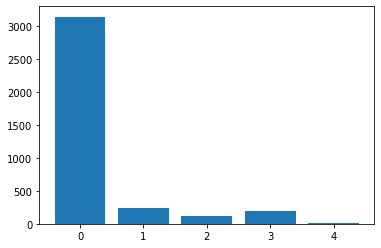

In [52]:
# load and summarize the dataset
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
train
data = train.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=3136 (20.000%)
Class=1, n=3136 (20.000%)
Class=2, n=3136 (20.000%)
Class=3, n=3136 (20.000%)
Class=4, n=3136 (20.000%)


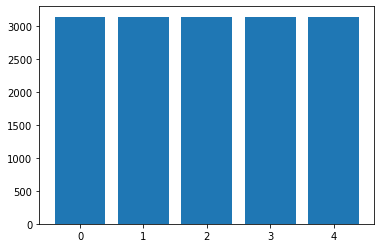

In [53]:
# example of oversampling a multi-class classification dataset
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
train
data = train.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [54]:
# Split data into train and test sets
X = train.drop('Category', axis=1)
y = train['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#fiting the model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [57]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.9715832205683356
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       632
           1       0.97      0.81      0.89        43
           2       0.93      0.96      0.94        26
           3       0.93      0.75      0.83        36
           4       1.00      1.00      1.00         2

    accuracy                           0.97       739
   macro avg       0.96      0.90      0.93       739
weighted avg       0.97      0.97      0.97       739



In [58]:
# Train the Random Forest Classifier on the training dataset

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X, y)
print(grid_search)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})
Best Hyperparameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best Score:  0.8738836265223275


In [59]:
# Evaluate the model's performance on the testing dataset
parameters = {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}

rfc1 = RandomForestClassifier(**parameters)
rfc1.fit(X_train,y_train)
y_pred = rfc1.predict(X_test)
# y_pred = grid_search.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.9607577807848444
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       632
           1       1.00      0.81      0.90        43
           2       0.96      0.88      0.92        26
           3       0.88      0.61      0.72        36
           4       1.00      0.50      0.67         2

    accuracy                           0.96       739
   macro avg       0.96      0.76      0.84       739
weighted avg       0.96      0.96      0.96       739



## Test

In [60]:
pd.set_option('display.max_rows',1000)
test = df.loc[3695:]

In [61]:
test

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
3695,B6,D1,C0,E134,930.076541,897.003874,856.459905,837.175251,NaN
3696,B6,D1,C0,E1293,930.076541,888.450556,836.995193,818.672007,NaN
3697,B6,D1,C0,E390,930.076541,895.639633,856.459905,837.175251,NaN
3698,B6,D1,C0,E1294,930.076541,897.167475,856.459905,837.175251,NaN
3699,B6,D1,C0,E1295,930.076541,897.167475,853.612419,837.175251,NaN
...,...,...,...,...,...,...,...,...,...
4715,B8,D15,C4,E1505,816.780325,846.908198,747.866497,738.087166,NaN
4716,B8,D15,C4,E1506,743.441494,804.010713,666.495417,657.722959,NaN
4717,B8,D15,C4,E1507,801.134982,837.856874,794.708694,837.175251,NaN
4718,B8,D15,C4,E486,930.076541,897.167475,856.459905,832.326991,NaN


In [62]:
# Check for missing values and data distribution
# Data Analysis and Preprocessing
print(test.dtypes) # Check datatype of each column
print(test.describe()) # Summary statistics of numerical columns
print(test.isnull().sum())

CompanyName                object
Financial Department       object
Financial AccountGroup     object
VendorName                 object
Amount Month 1            float64
Amount Month 2            float64
Amount Month 3            float64
Amount Month 4            float64
Category                   object
dtype: object
       Amount Month 1  Amount Month 2  Amount Month 3  Amount Month 4
count     1022.000000     1025.000000     1023.000000     1025.000000
mean       910.597633      885.146934      836.357166      818.512243
std         50.640650       33.582057       51.479801       48.953445
min        645.890996      575.447214      539.459348      551.001649
25%        925.012416      893.847548      850.972467      829.674031
50%        930.076541      896.840513      856.013334      836.874373
75%        930.076541      897.167475      856.459905      837.175251
max        937.659618      918.326758      944.673672     1113.476639
CompanyName                  0
Financial Departmen

In [63]:
# Impute missing values (mean, median, mode) for the "Amount Month" columns
test["Amount Month 1"].fillna(test["Amount Month 1"].median(), inplace=True)
test["Amount Month 3"].fillna(test["Amount Month 3"].median(), inplace=True)

In [64]:
print(test.isnull().sum())

CompanyName                  0
Financial Department         0
Financial AccountGroup       0
VendorName                   0
Amount Month 1               0
Amount Month 2               0
Amount Month 3               0
Amount Month 4               0
Category                  1025
dtype: int64


In [65]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
test["CompanyName"] = le.fit_transform(test["CompanyName"])
test["VendorName"] = le.fit_transform(test["VendorName"])
test["Financial Department"] = le.fit_transform(test["Financial Department"])
test["Financial AccountGroup"] = le.fit_transform(test["Financial AccountGroup"])
#test["Category"] = le.fit_transform(test["Category"].astype(str))

In [66]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
test[["Amount Month 1", "Amount Month 2", "Amount Month 3", "Amount Month 4"]] = scaler.fit_transform(test[["Amount Month 1", "Amount Month 2", "Amount Month 3", "Amount Month 4"]])

In [67]:
test.drop(columns = {'VendorName','Category'},inplace=True)

In [68]:
test

,CompanyName,Financial Department,Financial AccountGroup,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
3695,0,1,0,0.384191,0.353246,0.390269,0.381426
3696,0,1,0,0.384191,0.098423,0.011664,0.003265
3697,0,1,0,0.384191,0.312602,0.390269,0.381426
3698,0,1,0,0.384191,0.358120,0.390269,0.381426
3699,0,1,0,0.384191,0.358120,0.334883,0.381426
...,...,...,...,...,...,...,...
4715,2,3,3,-1.856960,-1.139222,-1.721962,-1.643691
4716,2,3,3,-3.307700,-2.417238,-3.304695,-3.286138
4717,2,3,3,-2.166446,-1.408882,-0.810843,0.381426
4718,2,3,3,0.384191,0.358120,0.390269,0.282340


## 1. To Predict the label for the bills with blank categories

In [69]:
test_values = test.values
test_values[1]


array([0.        , 1.        , 0.        , 0.38419112, 0.09842263,
       0.01166414, 0.00326518])

In [70]:
new_data = rfc1.predict(test_values)
new_data

array([0, 0, 0, ..., 3, 0, 0])

In [71]:
pred = pd.DataFrame({"Predicted_label_Category":new_data})
pred

,Predicted_label_Category
0,0
1,0
2,0
3,0
4,0
...,...
1020,0
1021,3
1022,3
1023,0


In [72]:
test.reset_index(drop=True,inplace=True)

In [73]:
test

,CompanyName,Financial Department,Financial AccountGroup,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
0,0,1,0,0.384191,0.353246,0.390269,0.381426
1,0,1,0,0.384191,0.098423,0.011664,0.003265
2,0,1,0,0.384191,0.312602,0.390269,0.381426
3,0,1,0,0.384191,0.358120,0.390269,0.381426
4,0,1,0,0.384191,0.358120,0.334883,0.381426
...,...,...,...,...,...,...,...
1020,2,3,3,-1.856960,-1.139222,-1.721962,-1.643691
1021,2,3,3,-3.307700,-2.417238,-3.304695,-3.286138
1022,2,3,3,-2.166446,-1.408882,-0.810843,0.381426
1023,2,3,3,0.384191,0.358120,0.390269,0.282340


In [74]:
# Prediction of the label for the bills with blank categories
new = pd.concat([test,pred],axis=1)

In [75]:
new

,CompanyName,Financial Department,Financial AccountGroup,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Predicted_label_Category
0,0,1,0,0.384191,0.353246,0.390269,0.381426,0
1,0,1,0,0.384191,0.098423,0.011664,0.003265,0
2,0,1,0,0.384191,0.312602,0.390269,0.381426,0
3,0,1,0,0.384191,0.358120,0.390269,0.381426,0
4,0,1,0,0.384191,0.358120,0.334883,0.381426,0
...,...,...,...,...,...,...,...,...
1020,2,3,3,-1.856960,-1.139222,-1.721962,-1.643691,0
1021,2,3,3,-3.307700,-2.417238,-3.304695,-3.286138,3
1022,2,3,3,-2.166446,-1.408882,-0.810843,0.381426,3
1023,2,3,3,0.384191,0.358120,0.390269,0.282340,0


### Result : So, new data will give us predicted labels for the bills with the blank Categories as Predicted_label_Category.

## 2. To Predict the label for the new set of bills which will be added in future.

In [ ]:
#predict labels for new set of bills
new_bills_data = pd.read_excel(r'new_bills.xlsx')
predicted_categories = rfc1.predict(new_bills_data)

# print predicted categories
print(predicted_categories)


In [79]:
new_input1020 = [[2,3,3,-1.856960,-1.139222,-1.721962,-1.643691]]
new_output = rfc1.predict(new_input1020)
print("Category",new_output)

Category [0]


In [80]:
#Using Another Method
new_input1021 = [[2,3,3,-3.307700,-2.417238,-3.304695,-3.286138]]
new_output = rfc1.predict(new_input1021)
print("Category",new_output)

Category [3]


In [81]:
new_input1022 = [[2,3,3,-2.166446,-1.408882,-0.810843,0.381426]]
new_output = rfc1.predict(new_input1022)
print("Category",new_output)

Category [3]


### Interpretation : As, we give new_input to the model using 'CompanyName', 'Financial Department', 'Financial AccountGroup','Amount Month 1','Amount Month 2','Amount Month 3', 'Amount Month 4' columns of the dataset we will get new output for our target Variable 'Category'. 
### Using this, We can predict the label for the new set of bills which will be added in future using any record from the dataset.

### Conclusion : Random Forest Classifier Algorithm is best classifier and The key advantage of random forest is that it can handle high-dimensional data and reduce the risk of overfitting by randomly selecting a subset of the features and data for each tree. Additionally, random forest can handle missing data, outliers, and nonlinear relationships between the features and the target variable.
### Overall, random forest is a powerful and flexible algorithm that can be applied to a wide range of classification and regression problems.